In [26]:
# импортируем необходимые библиотеки и считываем файл с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

df = pd.read_csv('//home/jupyter-i.netreba-11/Mat_stat/conversion.csv')

In [ ]:
# знакомимся с данными

In [2]:
df.shape

(1143, 11)

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
#проверяем количество пропущенных значений

In [4]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [ ]:
# считаем кликабельность (CTR) и добавлем в новую колонку

In [8]:
df['CTR'] = df.Clicks / df.Impressions

In [ ]:
# находим строку с максимальным значением CTR в данных

In [9]:
df['CTR'].idxmax()

150

In [10]:
df.iloc[150]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

In [ ]:
# считаем и добавляем новую метрику затрат на клик CPC

In [13]:
df['CPC'] = df.Spent / df.Clicks

In [ ]:
# смотрим распределение CPC с группировкой по полу пользователя

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


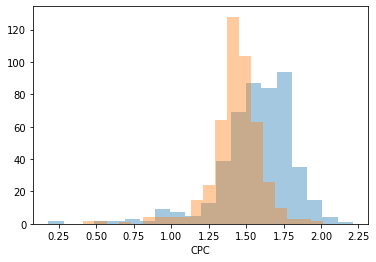

In [23]:
sns.distplot(df.query("gender=='M'").CPC.dropna(), kde=False, bins = 20)
sns.distplot(df.query("gender=='F'").CPC.dropna(), kde=False, bins = 20)

In [ ]:
# считаем и добавлем метрику CR

In [15]:
df['CR'] = ((df.Approved_Conversion / df.Clicks) * 100).round(2)

In [25]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.00
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.00
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.00
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.79
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.00
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.00
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926,1.48
